# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about data tidying and how to make it easy and effective. The structure of tidy datasets make them easy to clean, analyze, and work with. The paper emphasizes the importance of having a consistent data structure and matching tools.

2. The tidy data standard is intended to make the initial exploration and analysis of data smoother. It is also intented to make sure the development of matching data analysis tools is easier so that they can work well together.

3. The first sentence is a metaphor comparing families to tidy datasets. All tidy datasets follow the same structure, or physical layout. However, they have different elements that require cleaning, depending on the dataset and the context in which the data needs to be used. Thus, while the general tools for cleaning data are the same, the way in which they will be used and whether or not a specific tool is necessary depends on the unique dataset.

    The second sentence describes how different datasets have varying meanings and uses for the same type of data. Depending on the context, a phone number, for example, can serve as either a variable or an observation. It is important to consider the context in which a dataset is being analyzed so that during data cleaning, variables and observations can be clearly defined and modified.

4. Wickham defines values as numbers, if the data is quantitative, or strings, if the data is qualitative. He defines variables as containing all values that measure a common undelrying attribute, such as height or temperature, across units. He defines observations as containing all values measured on the same unit, such as a particular person or day, across attributes.

5. In section 2.3,  tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. There are 3 main conditions that tidy data meets:

    1. Each variable forms a column
    2. Each observation forms a row
    3. Each type of observational unit forms a table

6. The 5 most common problems with messy datasets are the following:
    1. Column headers are values, not variable names
    2. Multiple variables are stored in one column
    3. Variables are stored in both rows and columns
    4. Multiple types of observational units are stored in the same table
    5. A single observational unit is stored in multiple tables

  The data in Table 4 are messy because the variables form both the rows and columns. Here, the column headers represent the religion variable and the income variable. While the religion variable looks generally okay on its own, the income values must be rows.

  Melting a dataset means to stack it, or turn columns into rows. Column values that are actually variables must be changed into rows, with an overarching variable name in the column instead.


7. Table 11 is messy because variables are located in individual columns, spread across columns, and across rows. They must be consolidated, with overarching variable names in the columns and corresponding values in the rows.

  Table 12a is molten because because the changes described above can be made, and the data has been melted. The missing values have also been dropped, which allows the table to be more concise and telling. Table 12b is tidy becuase there is one variable in each column, and each row represents a day's observations. All column names are as specific and concise as possible, with the telling a clear story.

8. The "chicken-and-egg" problem with focusing on tidy data is that if the data is only of use with the tools used to work on it, then the tools are not independent from the data. Thus, it is possible to get stuck in a loop where changing either the data structures or the data tools will not improve efficiency, but changing both will.

  Wickham hopes that in the future, peole will build on the current tidy data framework and develop even better solutions regarding data storage, and even better tools. This could make it possible to escape the chicken-and-egg problem with tidy data, or atleast make it easier to navigate.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Part 1 - Numeric Variable

In [19]:
# Load in libraries and packages
#! git clone https://github.com/DS3001/wrangling
import numpy as np
import pandas as pd

In [20]:
# Visualize dataset
airbnb_df = pd.read_csv('./wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' 

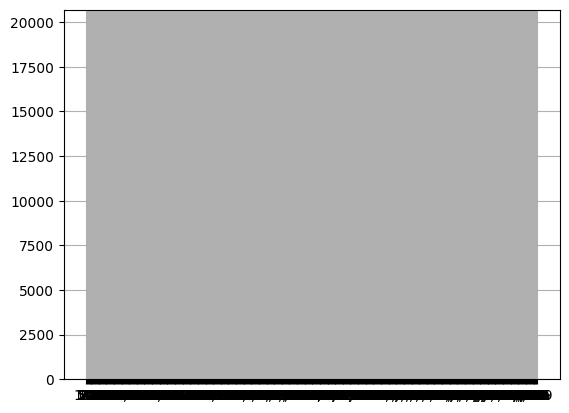

In [21]:
# Set and view variable
var = 'Price'
print('Before coercion: \n', airbnb_df[var].describe(),'\n') # The price variable is not read by Pandas as a number
print(airbnb_df[var].unique(),'\n') # Quotes also suggest that these are not numeric values
print(airbnb_df[var].hist(), '\n') # Nothing is showing up on histogram either

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

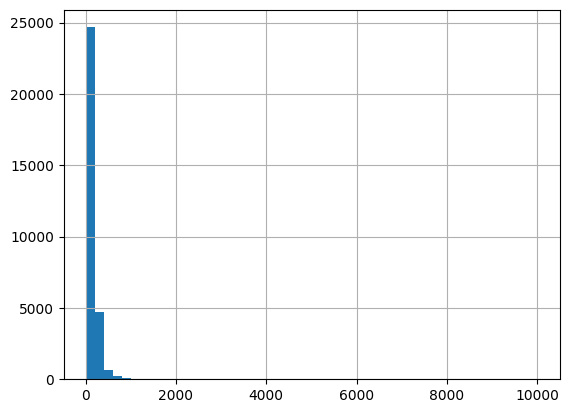

In [22]:
## Coerce to Numeric

# Take out commas from values
airbnb_df[var] = airbnb_df[var].str.replace(',', '')

# Coerce the price variable from object to numeric
airbnb_df[var] = pd.to_numeric(airbnb_df[var], errors='coerce')
print(airbnb_df[var].unique(),'\n') # Check to see if commas have been removed and variable has been coerced

# Create a missing dummy
airbnb_df[var+'_nan'] = airbnb_df[var].isnull()

# After coercion
print('After coercion: \n', airbnb_df[var].describe(),'\n') # Describe the price variable --> Float
airbnb_df[var].hist(bins = 50) # Histogram of the variable values -> Much better!
print('Total Missings: \n', sum(airbnb_df[var+'_nan']),'\n') # How many missing values are there? 0!

Part 2 - Categorical Variable

In [23]:
# Visualize dataset
sharks_df = pd.read_csv('./wrangling/assignment/data/sharks.csv', low_memory = False)
sharks_df.head()

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Set and view variable
var = 'Type'
print('Before changes: \n', sharks_df[var].describe(),'\n') # The type variable is not read by Pandas as a categorical value
print(sharks_df[var].unique(),'\n') # Unique values show that there may have been a mistype with the Boat category, and that there are nan values (All the unknown values)
print(sharks_df[var].value_counts(), '\n') # Now we can see how many times each type occurred --> seems like Boatomg was really a mistype

# Many of these categories can be grouped into one --> Watercraft

Before changes: 
 count           6457
unique            12
top       Unprovoked
freq            4716
Name: Type, dtype: object 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [25]:
## Change to Categorical

# Combine to Watercraft category
sharks_df[var] = sharks_df[var].replace(['Boatomg', 'Sea Disaster', 'Boat', 'Boating'], 'Watercraft')

# Change all unknown values using np.nan
sharks_df[var] = sharks_df[var].replace(['Invalid', 'Questionable', 'Unconfirmed', 'Unverified', 'Under investigation'], np.nan)

# Change the type variable from object to categorical
sharks_df[var] = sharks_df[var].astype('category')
print(sharks_df[var].unique(),'\n') # Check to see if all changes were made

# After changes
print('After changes: \n', sharks_df[var].describe(),'\n') # Describe the type variable
print(sharks_df[var].value_counts()) # Changes look good!

['Unprovoked', 'Provoked', NaN, 'Watercraft']
Categories (3, object): ['Provoked', 'Unprovoked', 'Watercraft'] 

After changes: 
 count           5892
unique             3
top       Unprovoked
freq            4716
Name: Type, dtype: object 

Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64


Part 3 - Dummy Variable

In [26]:
# Visualize dataset
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial_df = pd.read_csv(url, low_memory = False)
pretrial_df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [27]:
# Set and view variable
var = 'WhetherDefendantWasReleasedPretrial'
print(pretrial_df[var].unique(),'\n') # 0: not released, 1: released, 9: unclear
print(pretrial_df[var].value_counts(), '\n') # Everything else looks good, use np.nan on code 9

[9 0 1] 

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [28]:
## Use np.nan to replace missing values
pretrial_df['WhetherDefendantWasReleasedPretrial'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(pretrial_df[var].unique(),'\n') # 0: not released, 1: released, 9: unclear
print(pretrial_df[var].value_counts(), '\n') # Looks good!

[nan  0.  1.] 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



Part 4 - Missing Values

Before changes: 
 count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40

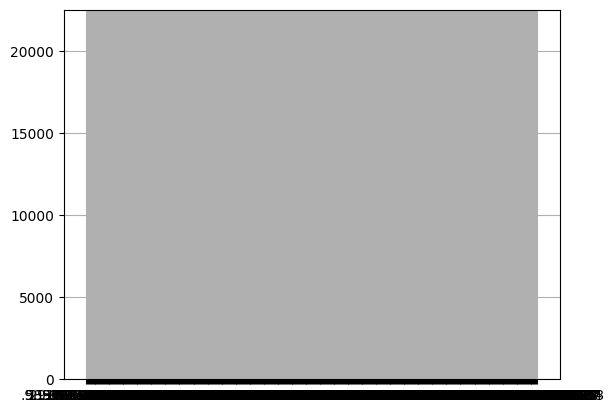

In [29]:
# Set and view variable
var = 'ImposedSentenceAllChargeInContactEvent'
print('Before changes: \n', pretrial_df[var].describe(),'\n')
print(pretrial_df[var].unique(),'\n') # Seems like there are missing values, data type is also not correct
print(pretrial_df[var].hist(), '\n') # Does not look good

False    13933
True      9053
Name: ImposedSentenceAllChargeInContactEvent_nan, dtype: int64
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent_nan                                  
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

False    22712
True       274
Name: ImposedSentenceAllChargeInContactEvent_nan, dtype: int64
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent_nan                                  
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

After changes: 
 count    22712.000000
mean        12.207737
std         50.725352
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max       2208.000000
N

<Axes: >

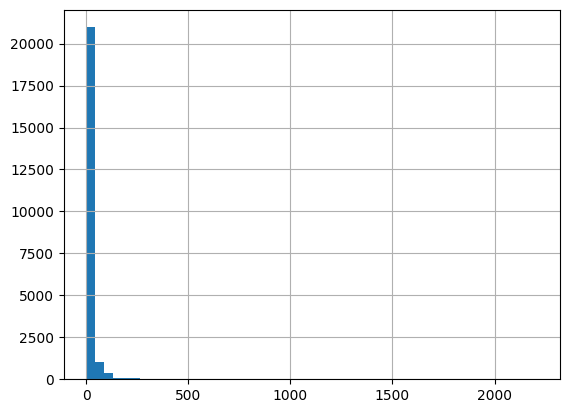

In [30]:
## Coerce to Numeric and get rid of Missing Values

# Coerce the variable to numeric
pretrial_df[var] = pd.to_numeric(pretrial_df[var], errors='coerce')

# Create a missing dummy --> True indicates missing, False indicates non-null
pretrial_df[var+'_nan'] = pretrial_df[var].isnull()
print(pretrial_df[var+'_nan'].value_counts()) # We have so many missing values, not good

# Look at 'SentenceTypeAllChargesAtConvictionInContactEvent' variable with the missing dummy
print(pd.crosstab(pretrial_df[var+'_nan'], pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')
# 0: Probation/no incarceration, 1: Jail up to 12 months, 2: Prison (one year or more)
# 4: Other, all charges in cohort contact resulted in pending, dismissed, deferred, etc., 9: Not applicable

# Change values of the variable we are cleaning to 0 for category 4, use np.nan for category 9
pretrial_df[var] = pretrial_df[var].mask(pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 0)
pretrial_df[var] = pretrial_df[var].mask(pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, np.nan)

# Update the missing dummy to see changes
pretrial_df[var+'_nan'] = pretrial_df[var].isnull()
print(pretrial_df[var+'_nan'].value_counts()) # So much better!
print(pd.crosstab(pretrial_df[var+'_nan'], pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

# After changes
print('After changes: \n', pretrial_df[var].describe(),'\n') # Describe the variable --> Looks good!
pretrial_df[var].hist(bins = 50) # Histogram of the variable values -> Much better!

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?